In [28]:
import pandas as pd
import numpy as np

# Generate date range from Jan 2017 to Dec 2022
start_date = '2017-01-01'
end_date = '2022-12-31'
date_range = pd.date_range(start=start_date, end=end_date, freq='M')

# Generate synthetic data with random values ranging from 85,000 to 200,000
np.random.seed(42)
min_cases = 85000
max_cases = 200000
data = np.random.randint(min_cases, max_cases + 1, size=len(date_range))

# Create a DataFrame with the generated data
df = pd.DataFrame({'Date': date_range, 'Cases': data})

# Save the data to a CSV file
df.to_csv('tuberculosis_data.csv', index=False)

print("Synthetic tuberculosis data has been generated and saved to 'tuberculosis_data.csv'.")


Synthetic tuberculosis data has been generated and saved to 'tuberculosis_data.csv'.


ARIMA Evaluation Metrics:
Mean Absolute Error (MAE): 28601.24
Mean Squared Error (MSE): 1005526166.44
Root Mean Squared Error (RMSE): 31710.03
R-squared (R²): -0.06


C:\Users\91783\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\91783\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\91783\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\91783\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


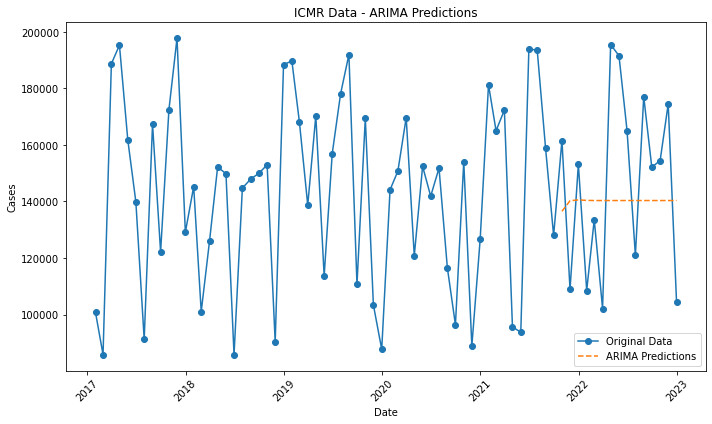

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the ICMR data from CSV
data = pd.read_csv(r'C:\Users\91783\Desktop\tuberculosis\tuberculosis_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

# ARIMA Model
# Identify order (p, d, q) using ACF and PACF plots or hyperparameter tuning
order = (2, 1, 1)
arima_model = ARIMA(train_data['Cases'], order=order)
arima_model_fit = arima_model.fit()

# Make predictions on the test set
arima_predictions = arima_model_fit.forecast(steps=len(test_data))

# Evaluation Metrics
mae_arima = mean_absolute_error(test_data['Cases'], arima_predictions)
mse_arima = mean_squared_error(test_data['Cases'], arima_predictions)
rmse_arima = np.sqrt(mse_arima)
r2_arima = r2_score(test_data['Cases'], arima_predictions)

print("ARIMA Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_arima:.2f}")
print(f"Mean Squared Error (MSE): {mse_arima:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_arima:.2f}")
print(f"R-squared (R²): {r2_arima:.2f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data['Cases'], label='Original Data', marker='o')
plt.plot(test_data.index, arima_predictions, label='ARIMA Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('ICMR Data - ARIMA Predictions')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
